In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys
sys.path.append('../')
import utils

In [205]:
# Gathering data
df       = pd.read_csv("../../data/chessdotcom/matches.csv")
# Lendo os users escolhidos
f        = open("../../data/chessdotcom/chosen_players.txt", "r")
chosen   = np.array([x[:-1] for x in f.readlines()])
# Ordenando para a busca binária
chosen   = np.sort(chosen)
# Players
players = pd.read_csv("../../data/chessdotcom/players.csv")

/home/pedrosa/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,3,4,5,6,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [236]:
# 1 Jan 2019
# 1546300800

# Queen's Gambit
# 1603411200

# 31 Dez 2020
# 1609372800

data = []
for x in list(players["joined"]):
    try:
        data.append(int(x))
    except:
        print(x)
data = sorted(data)

joined
joined
joined


In [383]:
# 1 Jan 2019
# 1546300800

# 1 Mar 2020
# 1583020800

# Queen's Gambit
# 1603411200

# 31 Dez 2020
# 1609372800

j = 0
ans = []

while(data[j] < (1583020800 - 86400)):
    j += 1
    
for i in range(1583020800, 1609372800, 86400):
    c = 0
    while(data[j] <= i):
        c += 1
        j += 1
    
    ans.append([i, c])
ans = np.array(ans)

In [392]:
x = [i for i in range(len(ans))]
y    = ans[:, 1]
days = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in ans[:, 0]]

In [390]:
from datetime import datetime
ts = int("1284101485")

# if you encounter a "year is out of range" error the timestamp
# may be in milliseconds, try `ts /= 1000` in that case
print()

2010-09-10 06:51:25


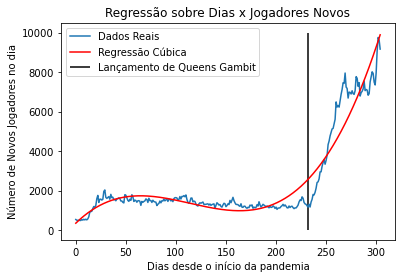

In [414]:
f = np.polyfit([i for i in range(len(y))], y, 3)
plt.plot(x, y, label = "Dados Reais")
plt.plot(x, [f[0]*i*i*i + f[1]*i*i + f[2]*i + f[3] for i in x], color = 'red', label = "Regressão Cúbica")
plt.title("Regressão sobre Dias x Jogadores Novos")
plt.xlabel("Dias desde o início da pandemia")
plt.ylabel("Número de Novos Jogadores no dia")
plt.vlines(232, 0, 10000, color = "black", label = "Lançamento de Queens Gambit")
plt.legend()
plt.savefig("../../results/graphs/regression.png")

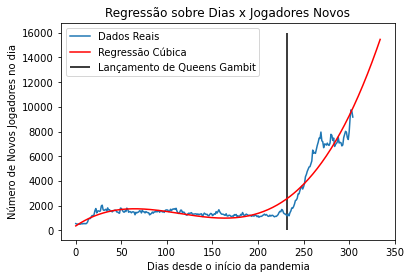

In [419]:
f = np.polyfit([i for i in range(len(y))], y, 3)
plt.plot(x, y, label = "Dados Reais")
z = [i for i in range(len((y)) + 30)]
plt.plot(z, [f[0]*i*i*i + f[1]*i*i + f[2]*i + f[3] for i in z], color = 'red', label = "Regressão Cúbica")
plt.title("Regressão sobre Dias x Jogadores Novos")
plt.xlabel("Dias desde o início da pandemia")
plt.ylabel("Número de Novos Jogadores no dia")
plt.vlines(232, 0, 16000, color = "black", label = "Lançamento de Queens Gambit")
plt.legend()
plt.savefig("../../results/graphs/regression_continued.png")

In [280]:
# 1 Jan 2019
# 1546300800

# Queen's Gambit
# 1603411200

# 31 Dez 2020
# 1609372800

j = 0
ans = []

while(data[j] < (1603411200 - 86400)):
    j += 1
    
for i in range(1603411200, 1609372800, 86400):
    c = 0
    while(data[j] <= i):
        c += 1
        j += 1
        if(data[j] > 1609372800):
            break
    
    ans.append([i, c])
ans = np.array(ans)

In [281]:
x = [i for i in range(len(ans))]
y = ans[:, 1]

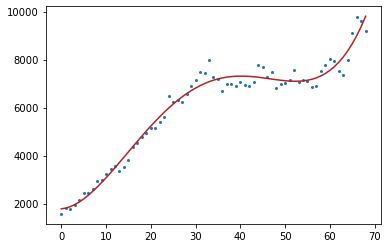

In [286]:
f = np.polyfit(x, y, 4)
plt.scatter(x, y, 4)
# print(f)
plt.plot(x, [f[0]*i*i*i*i + f[1]*i*i*i + f[2]*i*i + f[3]*i + f[4] for i in x], color = 'firebrick')
plt.title("Regressão após Queen's Gambit")